## PBL height from HREF data

In [1]:
%load_ext autoreload

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import seaborn as sns
import xarray as xr

## READ data
* csv file was created from vmix files 
* vmixing was run on each member of the HREF 
* options -a2 and -w1 were utilized.
* defaults used for rest.
* location was 38.8952 -77.0251 Hoover building

In [41]:
# The columns are the different members of the ensemble.
# There are ten members.
%autoreload
tdir = '../data'
mixht = pd.read_csv(os.path.join(tdir,'HREF_mixht.csv'),parse_dates=['date'])
mixht.set_index('date',inplace=True)  
#mixht['mean'] = mixht.mean(axis=1)
#mixht['std']= mixht.std(axis=1)

In [7]:
mlist = ['m{:02d}'.format(x) for x in np.arange(1,11)]
print(mlist)

['m01', 'm02', 'm03', 'm04', 'm05', 'm06', 'm07', 'm08', 'm09', 'm10']


In [39]:
# Take the dataframe and add another column with the LIDAR estimated PBLH. 
type(mixht.index.values[0])

numpy.datetime64

str

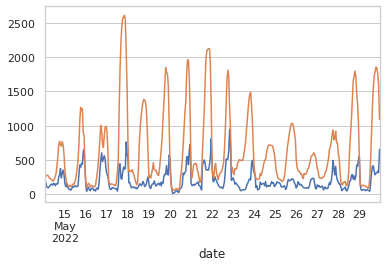

In [42]:
std = mixht.std(axis=1)
std.plot()
fig = plt.gcf()
fig.autofmt_xdate()
mean = mixht.mean(axis=1)
mean.plot()
fig = plt.gcf()
fig.autofmt_xdate()

2022-05-14 00:00:00 2022-05-17 00:00:00


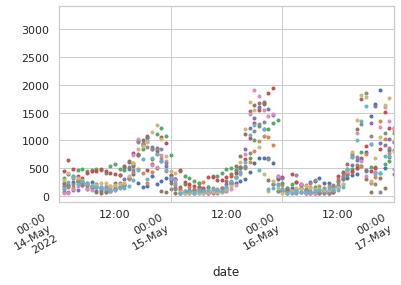

In [44]:
sns.set_style('whitegrid')
mixht.plot(legend=False, style='.')
fig = plt.gcf()
fig.autofmt_xdate()
ax = plt.gca()
d1 = datetime.datetime(2022,5,14,0)
d2 = d1 + datetime.timedelta(hours=72)
print(d1,d2)
ax.set_xlim(d1,d2)
#ax.set_ylim(0,500)
plt.show()

In [21]:
dset = xr.open_dataset('test.nc')

In [22]:
dset

<xarray.Dataset>
Dimensions:                        (date: 383, dim_0: 25, ens: 10, sid: 1)
Coordinates:
  * dim_0                          (dim_0) float64 0.01 0.055 ... 11.16 12.13
  * date                           (date) datetime64[ns] 2022-05-14T01:00:00 ...
  * ens                            (ens) object 'm09' 'm07' ... 'm10' 'm01'
  * sid                            (sid) object 'C1'
Data variables:
    __xarray_dataarray_variable__  (sid, ens, dim_0, date) float64 ...

## Try a rank histogram



## Rank histogram.
- order each row values from greatest to least
- marks where in the order the observation is.
-- if observation is lowest then it gets rank 0
-- if observation is highest then it gets rank 11
-- then create histogram with the ranks of each observation.

If your ensemble is well constructed then the rank histogram is flat. 

In [26]:
import rank

In [27]:
test = rank.Talagrand(thresh=0,nbins=11)

In [28]:
# make some fake data by pretending one of the ensemble members is observations.
rankdata = mixht.copy()
rankdata['obs'] = mixht['m01']
rankdata

,m01,m02,m03,m04,m05,m06,m07,m08,m09,m10,obs
date,,,,,,,,,,,
2022-05-14 01:00:00,187.4,223.0,319.8,449.1,74.17,241.4,50.05,122.9,284.1,153.0,187.4
2022-05-14 02:00:00,401.1,158.6,196.0,647.1,79.01,199.9,54.15,185.2,420.8,256.2,401.1
2022-05-14 03:00:00,260.9,171.3,352.3,480.9,116.90,321.8,119.00,210.9,338.1,357.7,260.9
2022-05-14 04:00:00,251.4,296.1,464.9,352.3,112.60,293.0,174.80,269.7,322.8,217.2,251.4
2022-05-14 05:00:00,252.8,242.6,491.8,330.6,229.00,191.6,193.80,194.0,295.5,261.9,252.8
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-29 19:00:00,1306.0,1395.0,1945.0,1992.0,1842.00,1807.0,2332.00,1917.0,2122.0,1898.0,1306.0
2022-05-29 20:00:00,1380.0,1292.0,1926.0,1932.0,1797.00,1911.0,2296.00,1780.0,2134.0,2000.0,1380.0
2022-05-29 21:00:00,1415.0,1084.0,1931.0,1886.0,1622.00,1679.0,2181.00,1646.0,2180.0,1895.0,1415.0


In [29]:
%autoreload
test.add_data(rankdata)
#[x for x in rankdata.columns if 'obs' in x]

['obs']


In [30]:
test.binra

array([18.        , 36.        , 37.5       , 36.16666667, 39.83333333,
       44.66666667, 36.5       , 34.33333333, 42.83333333, 40.33333333,
       16.83333333])

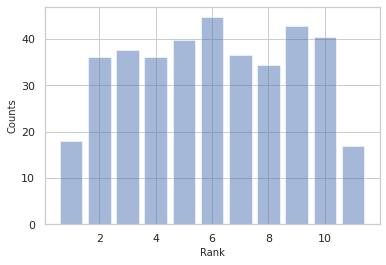

In [31]:

test.plotrank()

In [45]:
hname = '../data/BLHStats_202205.nc'
hset = xr.open_dataset(hname)

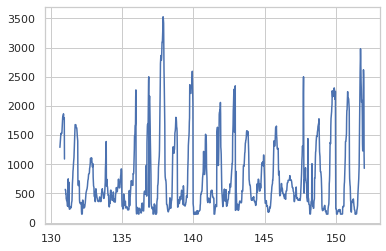

In [49]:
plt.plot(hset.yDay, hset.Height)

In [48]:
hset

<xarray.Dataset>
Dimensions:     (Ncols: 1584, year: 1)
Coordinates:
    year        (Ncols) float64 2.022e+03 2.022e+03 ... 2.022e+03 2.022e+03
Dimensions without coordinates: Ncols
Data variables:
    version     (year) float64 2.3
    yDay        (Ncols) float64 130.0 130.0 130.0 130.0 ... 152.0 152.0 152.0
    latitude    (Ncols) float64 39.99 39.99 39.99 39.99 ... 39.99 39.99 39.99
    longitude   (Ncols) float64 -105.3 -105.3 -105.3 ... -105.3 -105.3 -105.3
    Height      (Ncols) float64 nan nan nan nan ... 2.32e+03 1.175e+03 930.0
    lowHeight   (Ncols) float64 nan nan nan nan ... 2.275e+03 1.155e+03 920.0
    highHeight  (Ncols) float64 nan nan nan nan ... 2.52e+03 1.18e+03 1.15e+03
    QCFlag      (Ncols) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 2.0 2.0 2.0 1.0 3.0
    cloudBase   (Ncols) float64 nan nan nan nan nan ... 3.837e+03 nan nan nan
    precip      (Ncols) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

In [50]:
hset.yDay

<xarray.DataArray 'yDay' (Ncols: 1584)>
array([130.006944, 130.020833, 130.034722, ..., 151.965278, 151.979167,
       151.993056])
Coordinates:
    year     (Ncols) float64 2.022e+03 2.022e+03 ... 2.022e+03 2.022e+03
Dimensions without coordinates: Ncols
Attributes:
    units:         decimal day
    variableName:  Decimal Day of the Year

In [53]:
test = hset.yDay.values[0]
print(test,type(test))

130.00694444449618 <class 'numpy.float64'>


In [55]:
julian_day = np.floor(test)
hours = (test -julian_day)*24
print(julian_day, hours)

130.0 0.1666666679084301


In [59]:
datetime.datetime.strptime('2022130','%Y%j')

datetime.datetime(2022, 5, 10, 0, 0)

In [77]:
def make_time(yDay):
    julian_day = int(np.floor(yDay))
    hours = (yDay-julian_day)*24
    minutes = np.round(hours*60)
    dstr = "2022" + str(julian_day)
    #print(dstr)
    t1 = datetime.datetime.strptime(dstr, "%Y%j")
    t2 = t1 + datetime.timedelta(minutes=minutes)
    return t2

In [78]:
timelist = [make_time(x) for x in hset.yDay.values]

In [79]:
timelist

[datetime.datetime(2022, 5, 10, 0, 10),
 datetime.datetime(2022, 5, 10, 0, 30),
 datetime.datetime(2022, 5, 10, 0, 50),
 datetime.datetime(2022, 5, 10, 1, 10),
 datetime.datetime(2022, 5, 10, 1, 30),
 datetime.datetime(2022, 5, 10, 1, 50),
 datetime.datetime(2022, 5, 10, 2, 10),
 datetime.datetime(2022, 5, 10, 2, 30),
 datetime.datetime(2022, 5, 10, 2, 50),
 datetime.datetime(2022, 5, 10, 3, 10),
 datetime.datetime(2022, 5, 10, 3, 30),
 datetime.datetime(2022, 5, 10, 3, 50),
 datetime.datetime(2022, 5, 10, 4, 10),
 datetime.datetime(2022, 5, 10, 4, 30),
 datetime.datetime(2022, 5, 10, 4, 50),
 datetime.datetime(2022, 5, 10, 5, 10),
 datetime.datetime(2022, 5, 10, 5, 30),
 datetime.datetime(2022, 5, 10, 5, 50),
 datetime.datetime(2022, 5, 10, 6, 10),
 datetime.datetime(2022, 5, 10, 6, 30),
 datetime.datetime(2022, 5, 10, 6, 50),
 datetime.datetime(2022, 5, 10, 7, 10),
 datetime.datetime(2022, 5, 10, 7, 30),
 datetime.datetime(2022, 5, 10, 7, 50),
 datetime.datetime(2022, 5, 10, 8, 10),


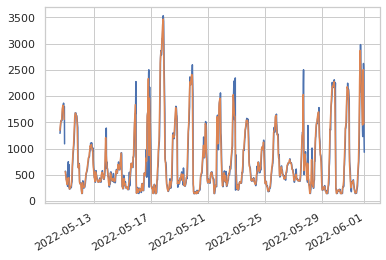

In [88]:
plt.plot(timelist, hset.Height)
plt.plot(dfmean.index, dfmean.values)
fig = plt.gcf()
fig.autofmt_xdate()

In [82]:
halodf = pd.DataFrame(hset.Height, index=timelist)

In [126]:
rs = 'Height'
hset[rs]

<xarray.DataArray 'Height' (Ncols: 1584)>
array([  nan,   nan,   nan, ..., 2320., 1175.,  930.])
Coordinates:
    year     (Ncols) float64 2.022e+03 2.022e+03 ... 2.022e+03 2.022e+03
Dimensions without coordinates: Ncols
Attributes:
    units:         meters
    variableName:  Boundary Layer Height

In [86]:
dfmean = halodf.resample('1H').mean()

In [89]:
mixht

,m01,m02,m03,m04,m05,m06,m07,m08,m09,m10
date,,,,,,,,,,
2022-05-14 01:00:00,187.4,223.0,319.8,449.1,74.17,241.4,50.05,122.9,284.1,153.0
2022-05-14 02:00:00,401.1,158.6,196.0,647.1,79.01,199.9,54.15,185.2,420.8,256.2
2022-05-14 03:00:00,260.9,171.3,352.3,480.9,116.90,321.8,119.00,210.9,338.1,357.7
2022-05-14 04:00:00,251.4,296.1,464.9,352.3,112.60,293.0,174.80,269.7,322.8,217.2
2022-05-14 05:00:00,252.8,242.6,491.8,330.6,229.00,191.6,193.80,194.0,295.5,261.9
...,...,...,...,...,...,...,...,...,...,...
2022-05-29 19:00:00,1306.0,1395.0,1945.0,1992.0,1842.00,1807.0,2332.00,1917.0,2122.0,1898.0
2022-05-29 20:00:00,1380.0,1292.0,1926.0,1932.0,1797.00,1911.0,2296.00,1780.0,2134.0,2000.0
2022-05-29 21:00:00,1415.0,1084.0,1931.0,1886.0,1622.00,1679.0,2181.00,1646.0,2180.0,1895.0


In [96]:
rankdf = pd.concat([mixht,dfmean], axis=1, join='inner')
columns = list(rankdf.columns)
columns[-1]='obs'
rankdf.columns=columns
rankdf

,m01,m02,m03,m04,m05,m06,m07,m08,m09,m10,obs
2022-05-14 01:00:00,187.4,223.0,319.8,449.1,74.17,241.4,50.05,122.9,284.1,153.0,348.333333
2022-05-14 02:00:00,401.1,158.6,196.0,647.1,79.01,199.9,54.15,185.2,420.8,256.2,295.000000
2022-05-14 03:00:00,260.9,171.3,352.3,480.9,116.90,321.8,119.00,210.9,338.1,357.7,336.666667
2022-05-14 04:00:00,251.4,296.1,464.9,352.3,112.60,293.0,174.80,269.7,322.8,217.2,535.000000
2022-05-14 05:00:00,252.8,242.6,491.8,330.6,229.00,191.6,193.80,194.0,295.5,261.9,503.333333
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-29 19:00:00,1306.0,1395.0,1945.0,1992.0,1842.00,1807.0,2332.00,1917.0,2122.0,1898.0,2180.000000
2022-05-29 20:00:00,1380.0,1292.0,1926.0,1932.0,1797.00,1911.0,2296.00,1780.0,2134.0,2000.0,2235.000000
2022-05-29 21:00:00,1415.0,1084.0,1931.0,1886.0,1622.00,1679.0,2181.00,1646.0,2180.0,1895.0,2273.333333
2022-05-29 22:00:00,1403.0,1034.0,1770.0,1711.0,1483.00,1355.0,2002.00,1455.0,2086.0,1675.0,2115.000000


In [95]:
rankdf.columns

Index(['m01', 'm02', 'm03', 'm04', 'm05', 'm06', 'm07', 'm08', 'm09', 'm10',
       0],
      dtype='object')

In [97]:
test = rank.Talagrand(thresh=0,nbins=11)

In [98]:
test.add_data(rankdf)

['obs']


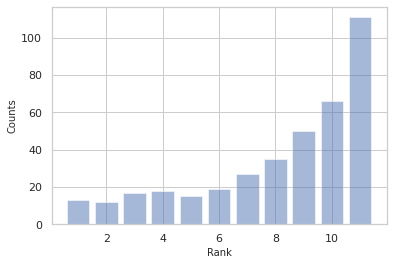

In [99]:
test.plotrank()

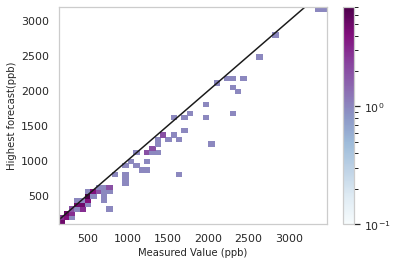

In [118]:
test.check1()

(738302.0, 738305.0)

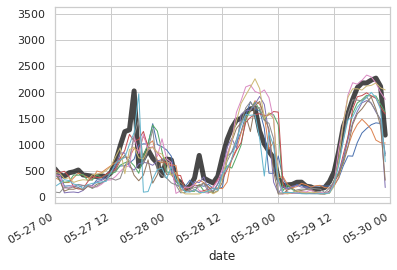

In [121]:
#mixht.plot(legend=False,LineWidth=1)
fig = plt.figure(1)
ax = fig.add_subplot(1,1,1)
ax.plot(rankdf.index.values,rankdf['obs'].values,'-k',LineWidth=5,alpha=0.8)
mixht.plot(ax=ax,legend=False,LineWidth=1)
d1 = datetime.datetime(2022,5,27)
d2 = datetime.datetime(2022,5,30)
ax.set_xlim(d1,d2)

## Halo data variance

In [128]:
import halo

In [129]:
hname = '../data/velStats_202205.nc'
vset = xr.open_dataset(hname)

In [124]:
vset

<xarray.Dataset>
Dimensions:    (Ncols: 1543, Nrows: 200, year: 1)
Coordinates:
    year       (Ncols) float64 ...
Dimensions without coordinates: Ncols, Nrows
Data variables:
    version    (year) float64 ...
    yDay       (Ncols) float64 ...
    latitude   (Ncols) float64 ...
    longitude  (Ncols) float64 ...
    height     (Nrows) float64 ...
    avgSnr     (Ncols, Nrows) float64 ...
    wVar       (Ncols, Nrows) float64 ...
    wSkew      (Ncols, Nrows) float64 ...
    wKurt      (Ncols, Nrows) float64 ...
    count      (Ncols, Nrows) float64 ...
    rawVar     (Ncols, Nrows) float64 ...
    crlbVar    (Ncols, Nrows) float64 ...

In [137]:
dfa = vset.to_dataframe()

In [142]:
dfa

version        yDay  latitude  longitude     height  \
Ncols Nrows year                                                        
0     0     0       120.0  130.634332   39.9929  -105.2614    93.4764   
      1     0       120.0  130.634332   39.9929  -105.2614   141.4764   
      2     0       120.0  130.634332   39.9929  -105.2614   189.4764   
      3     0       120.0  130.634332   39.9929  -105.2614   237.4764   
      4     0       120.0  130.634332   39.9929  -105.2614   285.4764   
...                   ...         ...       ...        ...        ...   
1542  195   0       120.0  151.955664   39.9929  -105.2614  9453.4764   
      196   0       120.0  151.955664   39.9929  -105.2614  9501.4764   
      197   0       120.0  151.955664   39.9929  -105.2614  9549.4764   
      198   0       120.0  151.955664   39.9929  -105.2614  9597.4764   
      199   0       120.0  151.955664   39.9929  -105.2614  9645.4764   

                     avgSnr      wVar     wSkew     wKurt   count    rawVar  \
Ncols Nrows year                                                              
0     0     0     -7.776913  0.000170  0.590338  6.796660  1413.0  0.000806   
      1     0     -7.475938  0.787271  0.658655  3.411858  1434.0  0.713643   
      2     0     -7.927235  0.977262  0.960522  4.082358  1434.0  0.882310   
      3     0     -8.307296  1.171525  1.048963  4.029818  1434.0  1.104512   
      4     0     -8.760858  1.224596  0.848357  4.012583  1434.0  1.183258   
...                     ...       ...       ...       ...     ...       ...   
1542  195   0    -24.244862       NaN       NaN       NaN     NaN       NaN   
      196   0    -23.856066       NaN       NaN       NaN     NaN       NaN   
      197   0    -24.469766       NaN       NaN       NaN     NaN       NaN   
      198   0    -23.754532       NaN       NaN       NaN     NaN       NaN   
      199   0    -24.773750       NaN       NaN       NaN     NaN       NaN   

                   crlbVar  
Ncols Nrows year            
0     0     0     0.053770  
      1     0     0.032938  
      2     0     0.035795  
      3     0     0.038362  
      4     0     0.041511  
...                    ...  
1542  195   0          NaN  
      196   0          NaN  
      197   0          NaN  
      198   0          NaN  
      199   0          NaN  

[308600 rows x 12 columns]

In [144]:
dfa['date'] = dfa.apply(lambda row: make_time(row['yDay']), axis=1)
dfb = dfa.reset_index()
#dfb.set_index(keys='')

In [151]:
dfb.set_index(keys=['date','height'],inplace=True)

In [152]:
dfc = dfb['wVar']

In [153]:
dfc.to_xarray()

ValueError: cannot convert a DataFrame with a non-unique MultiIndex into xarray

In [154]:
dfc  

date                 height   
2022-05-10 15:13:00  93.4764      0.000170
                     141.4764     0.787271
                     189.4764     0.977262
                     237.4764     1.171525
                     285.4764     1.224596
                                    ...   
2022-05-31 22:56:00  9453.4764         NaN
                     9501.4764         NaN
                     9549.4764         NaN
                     9597.4764         NaN
                     9645.4764         NaN
Name: wVar, Length: 308600, dtype: float64

In [155]:
import seaborn as sns